In [92]:
import sys
sys.path.append("..")
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.io
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D  
import rbf_gauss
from scipy.io import savemat

In [100]:
# Load multisine data from matlab
mat = scipy.io.loadmat("u_data.mat")
u_data = mat["u_data"]

mat = scipy.io.loadmat("y_data.mat")
y_data = mat["y_data"]

# convert data to tensors
u_data = np.array(u_data)
y_data = np.array(y_data)

u_data = torch.FloatTensor(u_data)
y_data = torch.FloatTensor(y_data)
y_data = y_data[:,0].unsqueeze(1)
#torch.reshape(y_data,(1000, 1))
u_data.shape

torch.Size([10000, 1])

In [94]:
# Hyper parameters
T_ini = 5
n_basis = 40
T = 1000
in_features = T_ini * 2
out_features = n_basis
N = 10

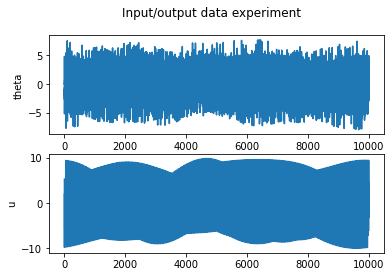

In [112]:
# Plot the pendulum trajectory together with the input
fig, axs = plt.subplots(3)
fig.suptitle("Input/output data experiment")
axs[0].plot(y_data[:,0])
#axs[1].plot(y_data[:,1])
axs[2].plot(u_data)
axs[1].set(ylabel="p")
#axs[1].set(ylabel="theta")
axs[2].set(ylabel="u")
plt.show()

In [111]:


N_training = list(y_data.shape)[0]

print(f"u_data = {(u_data).shape}")
print(f"y_data = {y_data.shape}")

U_ini = torch.transpose(u_data[0 : T_ini - 1], 0, 1)
U_0_Nm1 = torch.transpose(u_data[T_ini - 1 : T_ini + N - 1], 0, 1)

Y_ini = torch.transpose(y_data[1 : T_ini + 1], 0, 1)
Y_1_N = torch.transpose(y_data[T_ini + 1 : T_ini + 1 + N], 0, 1)

for i in range(T - T_ini - 1 - N):
    if i < 100:
        print(i)
    U_ini = torch.cat((U_ini, torch.transpose(u_data[i + 1 : T_ini + i], 0, 1)), 0)
    u_loop = torch.transpose(u_data[T_ini + i : T_ini + i + N], 0, 1)
    U_0_Nm1 = torch.cat((U_0_Nm1, u_loop), 0)

    Y_ini = torch.cat((Y_ini, torch.transpose(y_data[i + 2 : T_ini + 2 + i], 0, 1)), 0)
    y_loop = torch.transpose(y_data[T_ini + 2 + i : T_ini + 2 + i + N], 0, 1)
    Y_1_N = torch.cat((Y_1_N, y_loop), 0)
    print(f"U_ini = {(U_ini).shape}")
    print(f"Y_ini = {(Y_ini).shape}")
    print(f"U_0_Nm1 = {(U_0_Nm1).shape}")

X = torch.cat((U_ini, Y_ini, U_0_Nm1), 1)
y = Y_1_N
print(f"X = {(X).shape}")
print(f"y = {(y).shape}")


X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=41)


print(f"X_train_1 = {(X_train_1).shape}")
print(f"X_train_2 = {(X_train_2).shape}")

u_data = torch.Size([10000, 1])
y_data = torch.Size([10000, 1])
0
U_ini = torch.Size([2, 4])
Y_ini = torch.Size([2, 5])
U_0_Nm1 = torch.Size([2, 10])
1
U_ini = torch.Size([3, 4])
Y_ini = torch.Size([3, 5])
U_0_Nm1 = torch.Size([3, 10])
2
U_ini = torch.Size([4, 4])
Y_ini = torch.Size([4, 5])
U_0_Nm1 = torch.Size([4, 10])
3
U_ini = torch.Size([5, 4])
Y_ini = torch.Size([5, 5])
U_0_Nm1 = torch.Size([5, 10])
4
U_ini = torch.Size([6, 4])
Y_ini = torch.Size([6, 5])
U_0_Nm1 = torch.Size([6, 10])
5
U_ini = torch.Size([7, 4])
Y_ini = torch.Size([7, 5])
U_0_Nm1 = torch.Size([7, 10])
6
U_ini = torch.Size([8, 4])
Y_ini = torch.Size([8, 5])
U_0_Nm1 = torch.Size([8, 10])
7
U_ini = torch.Size([9, 4])
Y_ini = torch.Size([9, 5])
U_0_Nm1 = torch.Size([9, 10])
8
U_ini = torch.Size([10, 4])
Y_ini = torch.Size([10, 5])
U_0_Nm1 = torch.Size([10, 10])
9
U_ini = torch.Size([11, 4])
Y_ini = torch.Size([11, 5])
U_0_Nm1 = torch.Size([11, 10])
10
U_ini = torch.Size([12, 4])
Y_ini = torch.Size([12, 5])
U_0_Nm1 = t

U_ini = torch.Size([252, 4])
Y_ini = torch.Size([252, 5])
U_0_Nm1 = torch.Size([252, 10])
U_ini = torch.Size([253, 4])
Y_ini = torch.Size([253, 5])
U_0_Nm1 = torch.Size([253, 10])
U_ini = torch.Size([254, 4])
Y_ini = torch.Size([254, 5])
U_0_Nm1 = torch.Size([254, 10])
U_ini = torch.Size([255, 4])
Y_ini = torch.Size([255, 5])
U_0_Nm1 = torch.Size([255, 10])
U_ini = torch.Size([256, 4])
Y_ini = torch.Size([256, 5])
U_0_Nm1 = torch.Size([256, 10])
U_ini = torch.Size([257, 4])
Y_ini = torch.Size([257, 5])
U_0_Nm1 = torch.Size([257, 10])
U_ini = torch.Size([258, 4])
Y_ini = torch.Size([258, 5])
U_0_Nm1 = torch.Size([258, 10])
U_ini = torch.Size([259, 4])
Y_ini = torch.Size([259, 5])
U_0_Nm1 = torch.Size([259, 10])
U_ini = torch.Size([260, 4])
Y_ini = torch.Size([260, 5])
U_0_Nm1 = torch.Size([260, 10])
U_ini = torch.Size([261, 4])
Y_ini = torch.Size([261, 5])
U_0_Nm1 = torch.Size([261, 10])
U_ini = torch.Size([262, 4])
Y_ini = torch.Size([262, 5])
U_0_Nm1 = torch.Size([262, 10])
U_ini = to

U_0_Nm1 = torch.Size([481, 10])
U_ini = torch.Size([482, 4])
Y_ini = torch.Size([482, 5])
U_0_Nm1 = torch.Size([482, 10])
U_ini = torch.Size([483, 4])
Y_ini = torch.Size([483, 5])
U_0_Nm1 = torch.Size([483, 10])
U_ini = torch.Size([484, 4])
Y_ini = torch.Size([484, 5])
U_0_Nm1 = torch.Size([484, 10])
U_ini = torch.Size([485, 4])
Y_ini = torch.Size([485, 5])
U_0_Nm1 = torch.Size([485, 10])
U_ini = torch.Size([486, 4])
Y_ini = torch.Size([486, 5])
U_0_Nm1 = torch.Size([486, 10])
U_ini = torch.Size([487, 4])
Y_ini = torch.Size([487, 5])
U_0_Nm1 = torch.Size([487, 10])
U_ini = torch.Size([488, 4])
Y_ini = torch.Size([488, 5])
U_0_Nm1 = torch.Size([488, 10])
U_ini = torch.Size([489, 4])
Y_ini = torch.Size([489, 5])
U_0_Nm1 = torch.Size([489, 10])
U_ini = torch.Size([490, 4])
Y_ini = torch.Size([490, 5])
U_0_Nm1 = torch.Size([490, 10])
U_ini = torch.Size([491, 4])
Y_ini = torch.Size([491, 5])
U_0_Nm1 = torch.Size([491, 10])
U_ini = torch.Size([492, 4])
Y_ini = torch.Size([492, 5])
U_0_Nm1 = 

U_ini = torch.Size([736, 4])
Y_ini = torch.Size([736, 5])
U_0_Nm1 = torch.Size([736, 10])
U_ini = torch.Size([737, 4])
Y_ini = torch.Size([737, 5])
U_0_Nm1 = torch.Size([737, 10])
U_ini = torch.Size([738, 4])
Y_ini = torch.Size([738, 5])
U_0_Nm1 = torch.Size([738, 10])
U_ini = torch.Size([739, 4])
Y_ini = torch.Size([739, 5])
U_0_Nm1 = torch.Size([739, 10])
U_ini = torch.Size([740, 4])
Y_ini = torch.Size([740, 5])
U_0_Nm1 = torch.Size([740, 10])
U_ini = torch.Size([741, 4])
Y_ini = torch.Size([741, 5])
U_0_Nm1 = torch.Size([741, 10])
U_ini = torch.Size([742, 4])
Y_ini = torch.Size([742, 5])
U_0_Nm1 = torch.Size([742, 10])
U_ini = torch.Size([743, 4])
Y_ini = torch.Size([743, 5])
U_0_Nm1 = torch.Size([743, 10])
U_ini = torch.Size([744, 4])
Y_ini = torch.Size([744, 5])
U_0_Nm1 = torch.Size([744, 10])
U_ini = torch.Size([745, 4])
Y_ini = torch.Size([745, 5])
U_0_Nm1 = torch.Size([745, 10])
U_ini = torch.Size([746, 4])
Y_ini = torch.Size([746, 5])
U_0_Nm1 = torch.Size([746, 10])
U_ini = to

In [102]:
u_data[1 + 1 : T_ini + 1].shape

torch.Size([4, 1])

X_train = torch.Size([788, 19])
X_test = torch.Size([197, 19])


In [108]:
X_train_1 = X_train[:, 0 : (2 * T_ini - 1)]
X_train_2 = X_train[:, (2 * T_ini - 1) :]

X_test_1 = X_test[:, 0 : (2 * T_ini - 1)]
X_test_2 = X_test[:, (2 * T_ini - 1) :]
print(f"X_train_1 = {(X_train_1).shape}")
print(f"X_train_2 = {(X_train_2).shape}")

X_train_1 = torch.Size([788, 9])
X_train_2 = torch.Size([788, 10])


In [ ]:
# Create the neural network
class Model(nn.Module):
    def __init__(self, in_1_features, out_1_features, in_2_features, out_2_features):
        super().__init__()
        basis_func = rbf_gauss.RBF_gaussian.gaussian
        self.l_1 = rbf_gauss.RBF_gaussian(in_1_features, out_1_features,basis_func)
        self.l_2 = nn.Linear(in_2_features, out_2_features, bias=False)

    def forward(self, x1, x2):
        x1 = self.l_1(x1)
        x = torch.cat((x1, x2), 1)
        x = self.l_2(x)
        return x


In [ ]:
# create a manual seed for randomization
torch.manual_seed(41)
# Create an instance of our model
model = Model((2 * T_ini - 1), (n_basis), (n_basis + N), (N))
# Set the criterion for our model to measure the error
criterion = nn.MSELoss()
# Choose Adam optimizer, lr = Learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2, weight_decay=5e-5)

# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 2001
losses = []

for i in range(epochs):
    # Go forward and get a prediction
    y_pred = model.forward(X_train_1, X_train_2)  # get results

    # Measure the loss/error,
    loss = criterion(y_pred, y_train)

    # keep track of our losses
    losses.append(loss.detach().numpy())

    # print every 10 epoch
    if i % 10 == 0:
        print(f"Epoch: {i} and the loss: {loss}")

    # Do some back propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


# create a plot
plt.plot(range(epochs), losses)
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()


In [ ]:
with torch.no_grad():
    y_eval = model.forward(X_test_1, X_test_2)
type(y_test)

In [ ]:
# evaluate the model on the test data set
with torch.no_grad():  # turn off backpropagation
    y_eval = model.forward(X_test_1, X_test_2)  # are features from our test set
    loss = criterion(y_eval, y_test)  # Find the loss or error

# print the predicted output and the test data
print(f"y_eval = {y_eval}")
print(f"y_test = {y_test}")
print(f"y_eval-y_test = {y_eval-y_test}")


print("test 1")

# Convert the model parameters to numpy arrays
centers = model.l_1.centers.detach().numpy()
log_sigmas = model.l_1.log_sigmas.detach().numpy()
weight = model.l_2.weight.detach().numpy()

print("test 2")
# save the parameters for use in matlab
# convert parameters to arrays so they can be saved as .mat files
centers = {"centers": centers}
log_sigmas = {"log_sigmas": log_sigmas}
weight = {"weight": weight}
X_test = {"X_test": X_test}
y_test = {"y_test": y_test}

print("test 3")

# save as .mat file

savemat(
    "centers.mat",
    centers,
)
savemat(
    "log_sigmas.mat",
    log_sigmas,
)
# savemat(r"weight.mat", weight)


print(f"u_data = {u_data}")
print(f"u_data.shape = {u_data.shape}")